In [1]:
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers

import numpy as np

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings(action='ignore')

Using TensorFlow backend.


### Linear regression model

In [3]:
np.random.seed(0)
std_time = np.arange(1,7)
score = np.arange(10, 70, 10)

model = Sequential()
model.add(Dense(1, input_dim=1, activation='linear'))

sgd = optimizers.SGD(lr=0.01)

model.compile(optimizer=sgd, loss='mse', metrics=['accuracy'])
model.fit(std_time, score, batch_size=1, epochs=10, shuffle=False)

pred = model.predict([8])
print(f'x_test_input : 8 // y_prediction : {pred} // y_calculation : {8*10}')

Epoch 1/10
6/6 [==============================] - 1s 131ms/step - loss: 447.3494 - acc: 0.0000e+00
Epoch 2/10
6/6 [==============================] - 0s 7ms/step - loss: 1.9481 - acc: 0.1667
Epoch 3/10
6/6 [==============================] - 0s 6ms/step - loss: 1.2842 - acc: 0.1667
Epoch 4/10
6/6 [==============================] - 0s 9ms/step - loss: 1.2730 - acc: 0.1667
Epoch 5/10
6/6 [==============================] - 0s 7ms/step - loss: 1.2178 - acc: 0.1667
Epoch 6/10
6/6 [==============================] - 0s 7ms/step - loss: 1.1623 - acc: 0.1667
Epoch 7/10
6/6 [==============================] - 0s 6ms/step - loss: 1.1091 - acc: 0.1667
Epoch 8/10
6/6 [==============================] - 0s 5ms/step - loss: 1.0584 - acc: 0.1667
Epoch 9/10
6/6 [==============================] - 0s 6ms/step - loss: 1.0100 - acc: 0.1667
Epoch 10/10
6/6 [==============================] - 0s 6ms/step - loss: 0.9638 - acc: 0.1667
x_test_input : 8 // y_prediction : [[79.06331]] // y_calculation : 80


### Multiple linear regression model

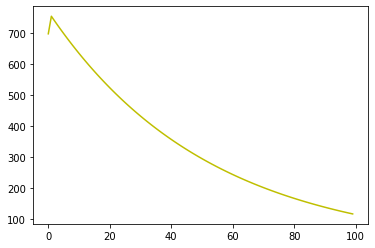

X_test_start : 98 // y_prediction : 196  //  y_calculation : 167


In [4]:
np.random.seed(0)
scores1 = np.random.randint(30, 100, size=5)
scores2 = np.random.randint(30, 100, size=5)

X = np.array(
    [[score, int(score*1.2), int(score*1.2*1.5) ] for score in scores1] +\
    [[score, int(score*0.9), int(score*0.9*1.9) ] for score in scores2]
)
y = np.array(
    [int(score*1.2*1.5*0.95) for score in scores1] +\
    [int(score*0.9*1.9*1.3) for score in scores2]
)

X_test = np.array([[98, int(98*1.2), int(98*1.2*1.5)]])


model = Sequential()
model.add( Dense(1, input_dim = 3, activation='linear') )

sgd = optimizers.SGD(lr=0.00001)

model.compile(optimizer=sgd, loss='mse', metrics=['mse'])

hist = model.fit(X, y, batch_size = 1, epochs = 100, shuffle = False, verbose=0)
# print(hist.history['loss'])
plt.plot(hist.history['loss'], 'y', label='train loss')
plt.show()

pred = int(model.predict(X_test))
cal = int(98*1.2*1.5*0.95)
print(f'X_test_start : 98 // y_prediction : {pred}  //  y_calculation : {cal}')